In [1]:
import numpy as np
import math
from matplotlib import pyplot


## Source and Sink Flow

(50, 50)
(50, 50)


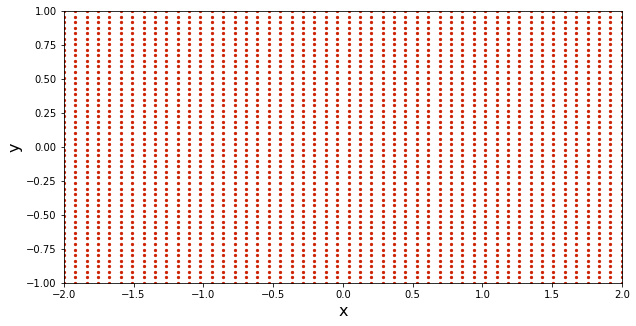

In [16]:
N = 50                                # number of points in each direction
x_start, x_end = -2.0, 2.0            # boundaries in the x-direction
y_start, y_end = -1.0, 1.0            # boundaries in the y-direction
x = np.linspace(x_start, x_end, N)    # creates a 1D-array with the x-coordinates
y = np.linspace(y_start, y_end, N)    # creates a 1D-array with the y-coordinates

#print('x = ', x)
#print('y = ', y)

X, Y = np.meshgrid(x, y)    
%matplotlib inline
# plot the grid of points
width = 10.0
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.scatter(X, Y, s=5, color='#CD2305', marker='o')


In [8]:
strength_source = 5.0                      # source strength
x_source, y_source = -1.0, 0.0             # location of the source

# compute the velocity field on the mesh grid
u_source = (strength_source / (2 * math.pi) *
            (X - x_source) / ((X - x_source)**2 + (Y - y_source)**2))
v_source = (strength_source / (2 * math.pi) *
            (Y - y_source) / ((X - x_source)**2 + (Y - y_source)**2))


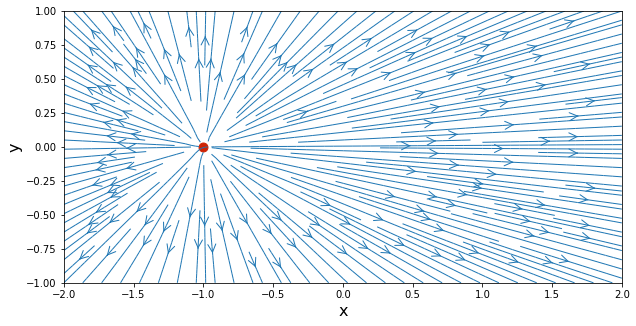

In [17]:
# plot the streamlines
width = 10.0
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u_source, v_source,
                  density=2, linewidth=1, arrowsize=2, arrowstyle='->')
pyplot.scatter(x_source, y_source,color='#CD2305', s=80, marker='o')


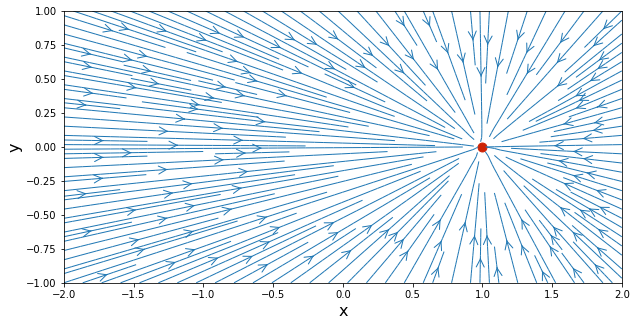

In [22]:
strength_sink = -50.0                     # strength of the sink
x_sink, y_sink = 1.0, 0.0                # location of the sink

# compute the velocity on the mesh grid
u_sink = (strength_sink / (2 * math.pi) *
          (X - x_sink) / ((X - x_sink)**2 + (Y - y_sink)**2))
v_sink = (strength_sink / (2 * math.pi) *
          (Y - y_sink) / ((X - x_sink)**2 + (Y - y_sink)**2))

# plot the streamlines
width = 10.0
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u_sink, v_sink,
                  density=2, linewidth=1, arrowsize=2, arrowstyle='->')
pyplot.scatter(x_sink, y_sink,
               color='#CD2305', s=80, marker='o');


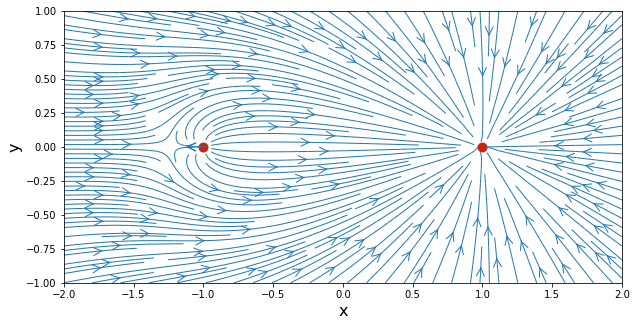

In [23]:
# compute the velocity of the pair source/sink by superposition
u_pair = u_source + u_sink
v_pair = v_source + v_sink

# plot the streamlines of the pair source/sink
width = 10.0
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u_pair, v_pair,
                  density=2.0, linewidth=1, arrowsize=2, arrowstyle='->')
pyplot.scatter([x_source, x_sink], [y_source, y_sink], 
               color='#CD2305', s=80, marker='o');


## Source-Sink in uniform velocity

In [44]:
N = 200                               # Number of points in each direction
x_start, x_end = -4.0, 4.0            # x-direction boundaries
y_start, y_end = -2.0, 2.0            # y-direction boundaries
x = np.linspace(x_start, x_end, N)    # 1D-array for x
y = np.linspace(y_start, y_end, N)    # 1D-array for y
X, Y = np.meshgrid(x, y)  


In [45]:
u_inf = 1.0        # freestream speed

# compute the freestream velocity field
u_freestream = u_inf * np.ones((N, N), dtype=float)
v_freestream = np.zeros((N, N), dtype=float)

# compute the stream-function
psi_freestream = u_inf * Y



In [46]:
def get_velocity(strength, xs, ys, X, Y):
    """
    Returns the velocity field generated by a source/sink.
    
    Parameters
    ----------
    strength: float
        Strength of the source/sink.
    xs: float
        x-coordinate of the source (or sink).
    ys: float
        y-coordinate of the source (or sink).
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    u: 2D Numpy array of floats
        x-component of the velocity vector field.
    v: 2D Numpy array of floats
        y-component of the velocity vector field.
    """
    u = strength / (2 * np.pi) * (X - xs) / ((X - xs)**2 + (Y - ys)**2)
    v = strength / (2 * np.pi) * (Y - ys) / ((X - xs)**2 + (Y - ys)**2)
    
    return u, v


In [47]:
def get_stream_function(strength, xs, ys, X, Y):
    """
    Returns the stream-function generated by a source/sink.
    
    Parameters
    ----------
    strength: float
        Strength of the source/sink.
    xs: float
        x-coordinate of the source (or sink).
    ys: float
        y-coordinate of the source (or sink).
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    psi: 2D Numpy array of floats
        The stream-function.
    """
    psi = strength / (2 * np.pi) * np.arctan2((Y - ys), (X - xs))
    
    return psi


In [48]:
strength_source = 5.0            # strength of the source
x_source, y_source = -1.0, 0.0   # location of the source

# compute the velocity field
u_source, v_source = get_velocity(strength_source, x_source, y_source, X, Y)

# compute the stream-function
psi_source = get_stream_function(strength_source, x_source, y_source, X, Y)


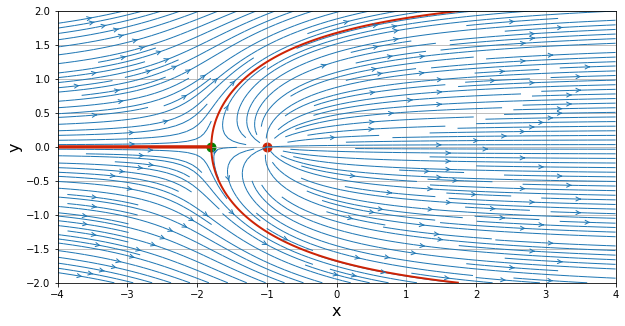

In [49]:
# superposition of the source on the freestream
u = u_freestream + u_source
v = v_freestream + v_source
psi = psi_freestream + psi_source

# plot the streamlines
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.grid(True)
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(x_source, y_source, color='#CD2305', s=80, marker='o')

# calculate the stagnation point
x_stagnation = x_source - strength_source / (2 * np.pi * u_inf)
y_stagnation = y_source

# display the stagnation point
pyplot.scatter(x_stagnation, y_stagnation, color='g', s=80, marker='o')

# display the dividing streamline
pyplot.contour(X, Y, psi, 
               levels=[-strength_source / 2, strength_source / 2], 
               colors='#CD2305', linewidths=2, linestyles='solid');


In [50]:
strength_sink = -5.0        # strength of the sink
x_sink, y_sink = 1.0, 0.0   # location of the sink

# compute the velocity field on the mesh grid
u_sink, v_sink = get_velocity(strength_sink, x_sink, y_sink, X, Y)

# compute the stream-function on the grid mesh
psi_sink = get_stream_function(strength_sink, x_sink, y_sink, X, Y)


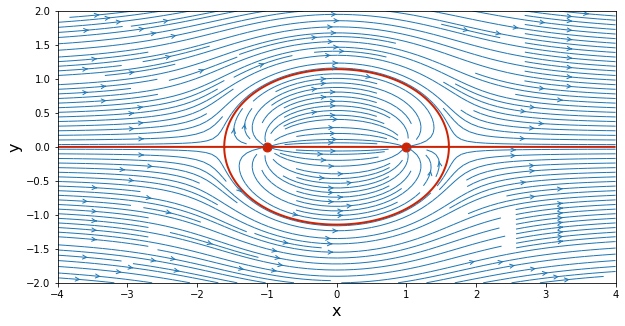

In [51]:
# superposition of a source and a sink on the freestream
u = u_freestream + u_source + u_sink
v = v_freestream + v_source + v_sink
psi = psi_freestream + psi_source + psi_sink

# plot the streamlines
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v,
                  density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter([x_source, x_sink], [y_source, y_sink],
               color='#CD2305', s=80, marker='o')
pyplot.contour(X, Y, psi,
               levels=[0.], colors='#CD2305', linewidths=2, linestyles='solid');


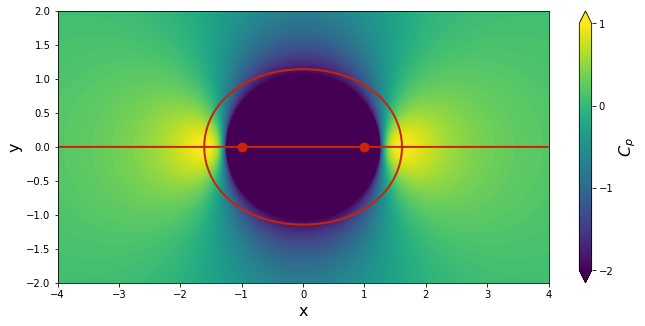

In [53]:
# compute the pressure coefficient field
cp = 1.0 - (u**2 + v**2) / u_inf**2

# plot the pressure coefficient field
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(1.1 * width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
contf = pyplot.contourf(X, Y, cp,
                        levels=np.linspace(-2.0, 1.0, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-2.0, -1.0, 0.0, 1.0])
pyplot.scatter([x_source, x_sink], [y_source, y_sink],
               color='#CD2305', s=80, marker='o')
pyplot.contour(X, Y, psi,
               levels=[0.], colors='#CD2305', linewidths=2, linestyles='solid');


## Doublet visualization

In [56]:
N = 50                                # Number of points in each direction
x_start, x_end = -2.0, 2.0            # x-direction boundaries
y_start, y_end = -1.0, 1.0            # y-direction boundaries
x = np.linspace(x_start, x_end, N)    # creates a 1D-array for x
y = np.linspace(y_start, y_end, N)    # creates a 1D-array for y
X, Y = np.meshgrid(x, y)     

kappa = 1.0                        # strength of the doublet
x_doublet, y_doublet = 0.0, 0.0


In [57]:
def get_velocity_doublet(strength, xd, yd, X, Y):
    
    u = (- strength / (2 * math.pi) *
         ((X - xd)**2 - (Y - yd)**2) /
         ((X - xd)**2 + (Y - yd)**2)**2)
    v = (- strength / (2 * math.pi) *
         2 * (X - xd) * (Y - yd) /
         ((X - xd)**2 + (Y - yd)**2)**2)
    
    return u, v

def get_stream_function_doublet(strength, xd, yd, X, Y):
   
    psi = - strength / (2 * math.pi) * (Y - yd) / ((X - xd)**2 + (Y - yd)**2)
    
    return psi


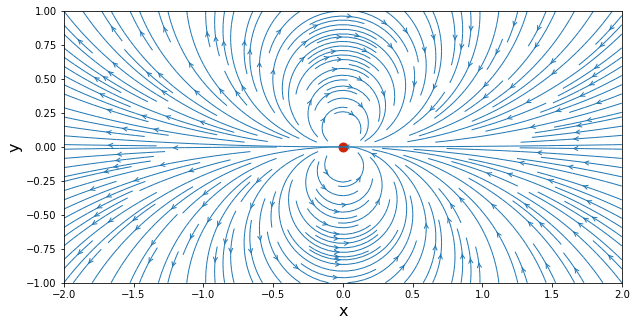

In [59]:
# compute the velocity field on the mesh grid
u_doublet, v_doublet = get_velocity_doublet(kappa, x_doublet, y_doublet, X, Y)

# compute the stream-function on the mesh grid
psi_doublet = get_stream_function_doublet(kappa, x_doublet, y_doublet, X, Y)

# plot the streamlines
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u_doublet, v_doublet,
                  density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(x_doublet, y_doublet, color='#CD2305', s=80, marker='o');


In [61]:
u_inf = 1.0  
u_freestream = u_inf * np.ones((N, N), dtype=float)
v_freestream = np.zeros((N, N), dtype=float)

psi_freestream = u_inf * Y


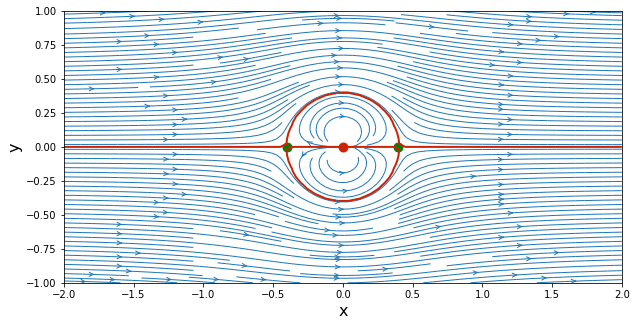

In [62]:
# superposition of the doublet on the freestream flow
u = u_freestream + u_doublet
v = v_freestream + v_doublet
psi = psi_freestream + psi_doublet

# plot the streamlines
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v,
                  density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.contour(X, Y, psi,
               levels=[0.], colors='#CD2305', linewidths=2, linestyles='solid')
pyplot.scatter(x_doublet, y_doublet, color='#CD2305', s=80, marker='o')

# calculate the stagnation points
x_stagn1, y_stagn1 = +math.sqrt(kappa / (2 * math.pi * u_inf)), 0.0
x_stagn2, y_stagn2 = -math.sqrt(kappa / (2 * math.pi * u_inf)), 0.0

# display the stagnation points
pyplot.scatter([x_stagn1, x_stagn2], [y_stagn1, y_stagn2],
               color='g', s=80, marker='o');


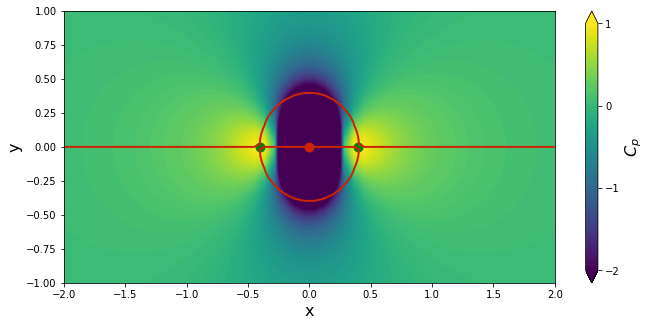

In [64]:
cp = 1.0 - (u**2 + v**2) / u_inf**2

# plot the pressure coefficient field
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(1.1 * width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
contf = pyplot.contourf(X, Y, cp,
                        levels=np.linspace(-2.0, 1.0, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-2.0, -1.0, 0.0, 1.0])
pyplot.scatter(x_doublet, y_doublet,
               color='#CD2305', s=80, marker='o')
pyplot.contour(X,Y,psi,
               levels=[0.], colors='#CD2305', linewidths=2, linestyles='solid')
pyplot.scatter([x_stagn1, x_stagn2], [y_stagn1, y_stagn2],
               color='g', s=80, marker='o');


## Assignment (Sources in shape of an airfoil)

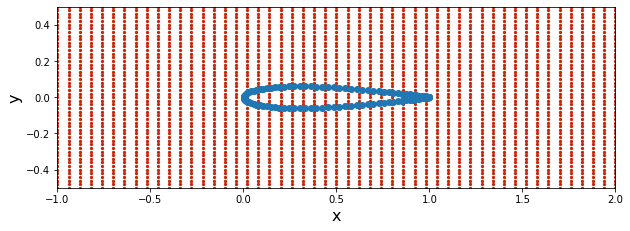

In [4]:
N = 51                                # number of points in each direction
x_start, x_end = -1.0, 2.0            # boundaries in the x-direction
y_start, y_end = -0.5, 0.5            # boundaries in the y-direction
x = np.linspace(x_start, x_end, N)    # creates a 1D-array with the x-coordinates
y = np.linspace(y_start, y_end, N)    # creates a 1D-array with the y-coordinates


X, Y = np.meshgrid(x, y)    
%matplotlib inline

# plot the grid of points
width = 10.0
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.scatter(X, Y, s=5, color='#CD2305', marker='o')
pyplot.scatter(x_foil,y_foil)


In [3]:
sigma_foil = np.loadtxt('NACA0012_sigma.txt')
x_foil = np.loadtxt('NACA0012_x.txt')
y_foil = np.loadtxt('NACA0012_y.txt')


In [5]:
u_inf = 1       # freestream speed

# compute the freestream velocity field
u_freestream = u_inf * np.ones((N, N), dtype=float)
v_freestream = np.zeros((N, N), dtype=float)

# compute the stream-function
psi_freestream = u_inf * Y


In [6]:
def get_velocity(strength, xs, ys, X, Y):
    
    u = np.zeros((X.shape),dtype='float')
    v = np.zeros((Y.shape),dtype='float')
    for i in range(len(xs)):
        u += strength[i] / (2 * np.pi) * (X - xs[i]) / ((X - xs[i])**2 + (Y - ys[i])**2)
        v += strength[i] / (2 * np.pi) * (Y - ys[i]) / ((X - xs[i])**2 + (Y - ys[i])**2)

    return u, v


In [7]:
def get_stream_function(strength, xs, ys, X, Y):
    
    psi = np.zeros((X.shape),dtype='float')
    for i in range(len(xs)):
        psi += strength[i] / (2 * np.pi) * np.arctan2((Y - ys[i]), (X - xs[i]))
    
    return psi


In [8]:
# compute the velocity field
u_source, v_source = get_velocity(sigma_foil, x_foil, y_foil, X, Y)

# compute the stream-function
psi_source = get_stream_function(sigma_foil, x_foil, y_foil, X, Y)


Text(0.5, 1.0, 'Flow over an Airfoil')

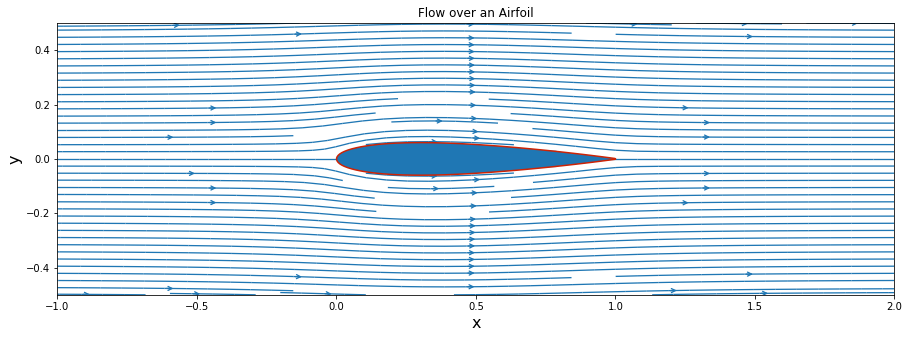

In [26]:
u_total = u_source + u_freestream
v_total = v_source + v_freestream
psi_total = psi_source + psi_freestream


N = 51                                # number of points in each direction
x_start, x_end = -1.0, 2.0            # boundaries in the x-direction
y_start, y_end = -0.5, 0.5            # boundaries in the y-direction
x = np.linspace(x_start, x_end, N)    # creates a 1D-array with the x-coordinates
y = np.linspace(y_start, y_end, N)    # creates a 1D-array with the y-coordinates

X, Y = np.meshgrid(x, y)    
%matplotlib inline


width = 15
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u_total, v_total,
                  density=1.3, linewidth=1.3, arrowsize=1, arrowstyle='->')
#pyplot.contour(X, Y, psi_total,
 #              levels=[0.], colors='#CD2305', linewidths=2, linestyles='solid')
pyplot.plot(x_foil,y_foil, color='#CD2305')
pyplot.fill(x_foil,y_foil)
pyplot.title('Flow over an Airfoil')


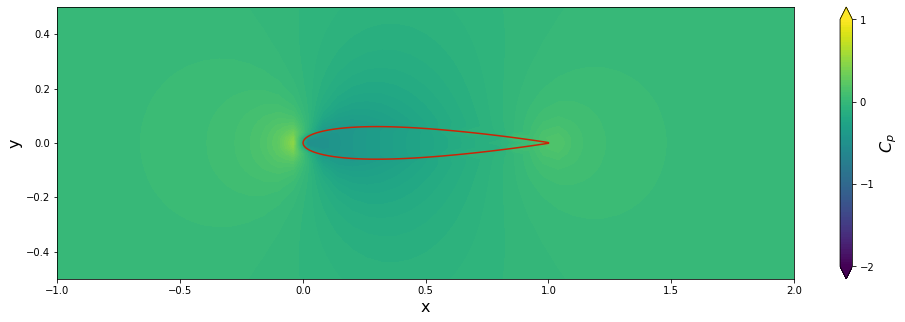

In [10]:
# compute the pressure coefficient field
cp_total = 1.0 - (u_total**2 + v_total**2) / u_inf**2

# plot the pressure coefficient field
width = 15
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(1.1 * width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
contf = pyplot.contourf(X, Y, cp_total,
                        levels=np.linspace(-2.0, 1.0, 100), extend='both')
cbar = pyplot.colorbar()
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-2.0, -1.0, 0.0, 1.0])
pyplot.plot(x_foil,y_foil, color='#CD2305')


In [11]:
ind = np.unravel_index(np.argmax(cp_total, axis=None), cp_total.shape)


In [57]:
X[ind],Y[ind]


(-0.040000000000000036, 0.0)

In [58]:
u_total[ind]


0.7270188021422664

In [60]:
np.max(u_total)


1.2459417440923677